In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def f(x):
    return 3*x**2 - 5*x + 5

In [5]:
f(7)

117

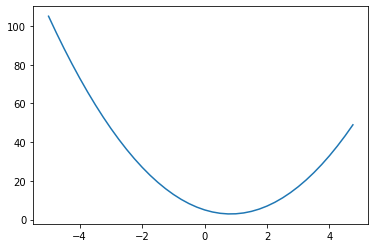

In [6]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [7]:
h = 0.00000000001
x = 3.0
(f(x + h) - f(x)) / h #get the numerical approximation of the slope

13.000089893466793

In [8]:
# let's get more compex
a = 2.0
b = -3.0
c = 10
d = a*b+c
print(d)

4.0


In [9]:
h = 0.00001

#inputs
a = 2.0
b = -3.0
c = 10

d1 = a*b + c
a += h
d2 = a*b + c
print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.9999699999999994
slope -3.000000000064062


In [10]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label 

    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')

        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')

        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

a = Value(-2.0, label='a')
b = Value(3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e+c; d.label = 'd'
f = Value(-2.0, label='f')
L = d*f; L.label = 'L'
L

Value(data=-8.0)

In [11]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') nod for it
        dot.node(name=uid, label = "{%s | data %.4f | grad %0.4f}" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        # conect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

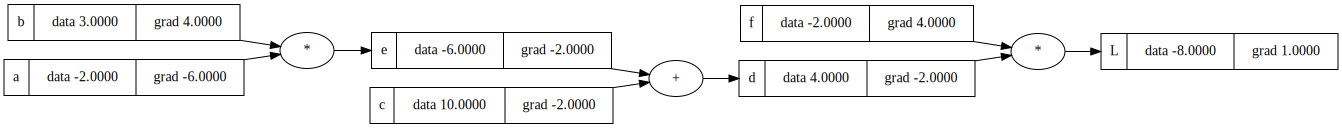

In [25]:
draw_dot(L)

In [ ]:
# L = d * f
# dL / dd = ?? -> f

# (f(x + h) - f(x)) / h
# ((d + h) * f - d * f ) / h
# d*f + h*f - d*f / h
# h*f/h -> f

dd / dc
d = c + e
(f(x + h) - f(x)) / h
((c + h + e) - c - e) / h
h/h -> 1

dd / dc -> 1.0
dd / de -> 1.0

Chain rule
dz/dx = dz/dy * dy/dx
dL/dc = dL/dd * dd/dc

WANT
dL/dc

KNOW
dL/dd
dd/dc



dL / de -> -2.0

WANT
dL / da

dL / da = dL / de * de / da

e = a * b
de/da ??
de / da = 3.0
de / db = -2.0

In [24]:
a.grad = 3.0 * -2.0
b.grad = -2.0 * -2.0

In [27]:
def lol():
    h = 0.001

    a = Value(-2.0, label='a')
    b = Value(3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d*f; L.label = 'L'
    L1 = L.data

    a = Value(-2.0, label='a')
    b = Value(3.0 + h, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e+c; d.label = 'd'
    f = Value(-2.0 , label='f')
    L = d*f; L.label = 'L'
    L2 = L.data

    print((L2 - L1)/h)
lol()

3.9999999999995595
